In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Keyword Searching

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
documents = [
    "Cats are small animals that love to chase mice and play with yarn.",
    "Dogs are loyal companions and are great at guarding homes.",
    "Cars need gasoline to run, while electric vehicles use batteris.",
    "Apples and bananas are common fruits taht people enjoy.",
    "Pandas are China's national treasure and love to eat banboo."
]
queries = [
    "Which animal loves to chase mice?",
    "What type of vehicle needs gasoline?",
    "What is China's national treasure?"
]

print("Example Documents:")
for i, doc in enumerate(documents, 1):
  print(f"Document {i}: {doc}")

print("Example Queries:")
for i, q in enumerate(queries, 1):
  print(f"Query {i}: {q}")

Example Documents:
Document 1: Cats are small animals that love to chase mice and play with yarn.
Document 2: Dogs are loyal companions and are great at guarding homes.
Document 3: Cars need gasoline to run, while electric vehicles use batteris.
Document 4: Apples and bananas are common fruits taht people enjoy.
Document 5: Pandas are China's national treasure and love to eat banboo.
Example Queries:
Query 1: Which animal loves to chase mice?
Query 2: What type of vehicle needs gasoline?
Query 3: What is China's national treasure?


In [ ]:
def preprocess(text):
  tokens = word_tokenize(text.lower())
  stop_words = set(stopwords.words("english"))
  tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
  return " ".join(tokens)

preprocessed_docs = [preprocess(doc) for doc in documents]
preprocessed_queries = [preprocess(q) for q in queries]

print("Preprocessed Documents:")
for i, doc in enumerate(preprocessed_docs, 1):
  print(f"Document {i}: {doc}")

Preprocessed Documents:
Document 1: cats small animals love chase mice play yarn
Document 2: dogs loyal companions great guarding homes
Document 3: cars need gasoline run electric vehicles use batteris
Document 4: apples bananas common fruits taht people enjoy
Document 5: pandas china national treasure love eat banboo


In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_docs) # Sparse Matrix
feature_names = vectorizer.get_feature_names_out() # lexicon
print("Feature Names: ", feature_names)

df_tfidf = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names,
    index=[f"Dcoument {i}" for i in range(1, 6)]
)
print("\nTF-IDF Matrix:")
print(df_tfidf)

Feature Names:  ['animals' 'apples' 'bananas' 'banboo' 'batteris' 'cars' 'cats' 'chase'
 'china' 'common' 'companions' 'dogs' 'eat' 'electric' 'enjoy' 'fruits'
 'gasoline' 'great' 'guarding' 'homes' 'love' 'loyal' 'mice' 'national'
 'need' 'pandas' 'people' 'play' 'run' 'small' 'taht' 'treasure' 'use'
 'vehicles' 'yarn']

TF-IDF Matrix:
             animals    apples   bananas    banboo  ...  treasure       use  vehicles      yarn
Dcoument 1  0.361529  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.361529
Dcoument 2  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000
Dcoument 3  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.353553  0.353553  0.000000
Dcoument 4  0.000000  0.377964  0.377964  0.000000  ...  0.000000  0.000000  0.000000  0.000000
Dcoument 5  0.000000  0.000000  0.000000  0.387757  ...  0.387757  0.000000  0.000000  0.000000

[5 rows x 35 columns]


In [ ]:
query_vectors = vectorizer.transform(preprocessed_queries)
cos_sim = cosine_similarity(query_vectors, tfidf_matrix)

df_results = pd.DataFrame(
    cos_sim,
    columns=[f"Document {i}" for i in range(1, 6)],
    index=[f"Query {i}" for i in range(1, 4)]
)
print("Cosine Similarity Matrix:")
print(df_results)

Cosine Similarity Matrix:
         Document 1  Document 2  Document 3  Document 4  Document 5
Query 1    0.511279         0.0    0.000000         0.0    0.000000
Query 2    0.000000         0.0    0.353553         0.0    0.000000
Query 3    0.000000         0.0    0.000000         0.0    0.671614


In [ ]:
for i in range(len(preprocessed_docs)):
  doc_vector = tfidf_matrix[i].toarray().flatten()
  top_indices = np.argsort(doc_vector)[-2:][::-1]  # get top 2 words
  top_keywords = [feature_names[idx] for idx in top_indices]
  print(f"Document {i+1} Top Keywords: {', '.join(top_keywords)}")

Document 1 Top Keywords: yarn, play
Document 2 Top Keywords: great, guarding
Document 3 Top Keywords: need, run
Document 4 Top Keywords: enjoy, common
Document 5 Top Keywords: pandas, national


In [ ]:
def search(query):
  preprocessed_query = preprocess(query)
  query_vec = vectorizer.transform([preprocessed_query])
  similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()
  most_similar_idx = np.argmax(similarities)
  return documents[most_similar_idx], similarities[most_similar_idx]

for query in queries:
  result, score = search(query)
  print(f"Search Result for '{query}'")
  print(f"Document: {result} (Similarity: {score})")
  print()

Search Result for 'Which animal loves to chase mice?'
Document: Cats are small animals that love to chase mice and play with yarn. (Similarity: 0.5112793808794187)

Search Result for 'What type of vehicle needs gasoline?'
Document: Cars need gasoline to run, while electric vehicles use batteris. (Similarity: 0.3535533905932738)

Search Result for 'What is China's national treasure?'
Document: Pandas are China's national treasure and love to eat banboo. (Similarity: 0.6716142362764496)



In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/Dataset/true_fake_news.zip"

Archive:  /content/gdrive/MyDrive/Dataset/true_fake_news.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
import re
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
class News():
  def __init__(self):
    self.data = self.load_data()

  def load_data(self):
    real_news = pd.read_csv("True.csv")
    fake_news = pd.read_csv("Fake.csv")
    real_news["Label"] = 0
    fake_news["Label"] = 1
    # real_news.append(fake_news)
    data = pd.concat([real_news, fake_news], ignore_index=True)
    return data

  def preprocess_text(self, text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

  def preprocess_data(self, data):
    data["cleaned_text"] = data["text"].apply(self.preprocess_text)
    return data

In [ ]:
news = News()
data = news.data
data

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [ ]:
data.isna().values.sum()

0

In [ ]:
data.isna().sum()

,0
title,0
text,0
subject,0
date,0
Label,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
data = news.preprocess_data(data)
data

,title,text,subject,date,Label,cleaned_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,seattlewashington reuters president donald tru...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,21st century wire says 21wire reported earlier...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,21st century wire says familiar theme whenever...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,patrick henningsen 21st century wireremember o...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,21st century wire says al jazeera america go h...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data["cleaned_text"],
    data["Label"],
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2) # unigram and bigram
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy:  0.9975501113585746
Claasification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4330
           1       1.00      1.00      1.00      4650

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



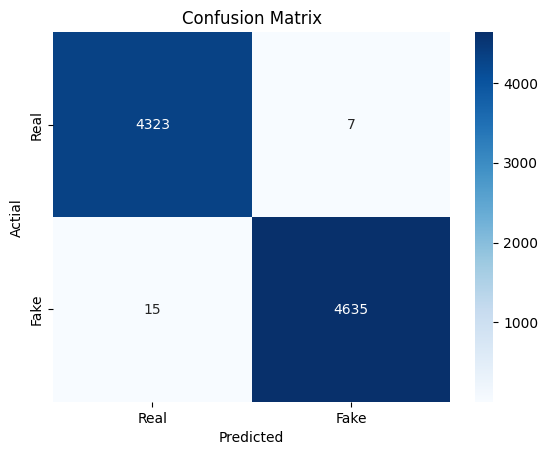

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train_tfidf, y_train)
y_pred = rf_model.predict(X_test_tfidf)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Claasification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Real", "Fake"],
    yticklabels=["Real", "Fake"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()